# Post-processing of the data
Now that we have the data processed and as a result of those we are left with text files for the times, longitudes and latitudes of sunspots, which are direct measurements from the data, we are ready to obtain indirect measurements from them, such as angular speeds and everything that may be acquired from the data sets text files.

These text files with the data are stored as follows (paths are relative to the location of this notebook):

    results
    ├── set1
    │   ├── set1_latitudes_0.txt
    │   ├── set1_latitudes_1.txt
    │   ├── set1_longitudes_0.txt
    │   ├── set1_longitudes_1.txt
    │   └── set1_times.txt
    ├── set2
    │   ├── set2_latitudes_0.txt
    │   ├── set2_latitudes_1.txt
    │   ├── set2_longitudes_0.txt
    │   ├── set2_longitudes_1.txt
    │   └── set2_times.txt
    ...

    10 directories, 32 files
    
Where the number after the "_" character means the index of spots, in case the data was acquired for more than 1 spot per image/data set.

In [7]:
# basic python modules and tools
import numpy as np
import matplotlib.pyplot as plt

## Measuring sun rotation from a single set

In [4]:
# Extracting data from saved files
setstr = "set9"  # name of the directory for the set
longitudes_0_1 = np.loadtxt("results/"+setstr+"/"+setstr+"_longitudes_0.txt")
latitudes_0_1 = np.loadtxt("results/"+setstr+"/"+setstr+"_latitudes_0.txt")
times_0_1 = np.loadtxt("results/"+setstr+"/"+setstr+"_times.txt")

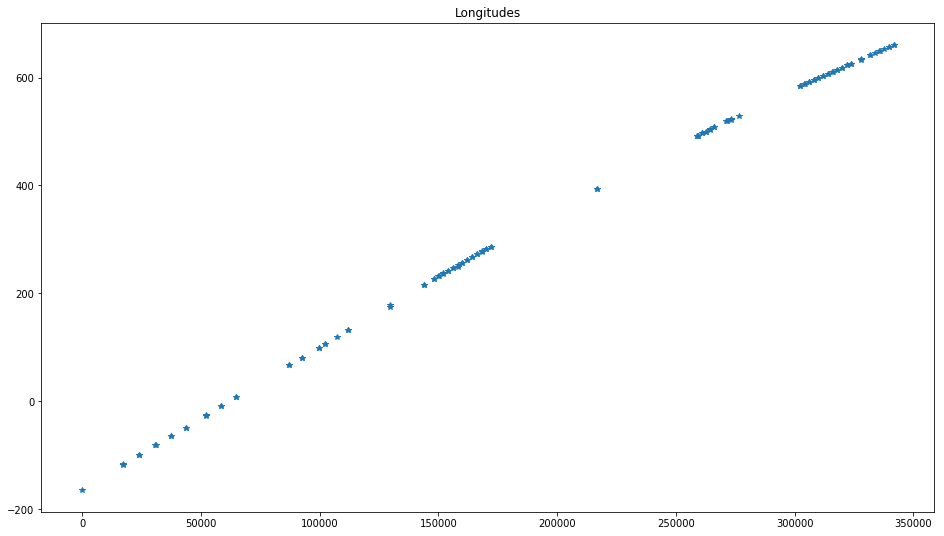

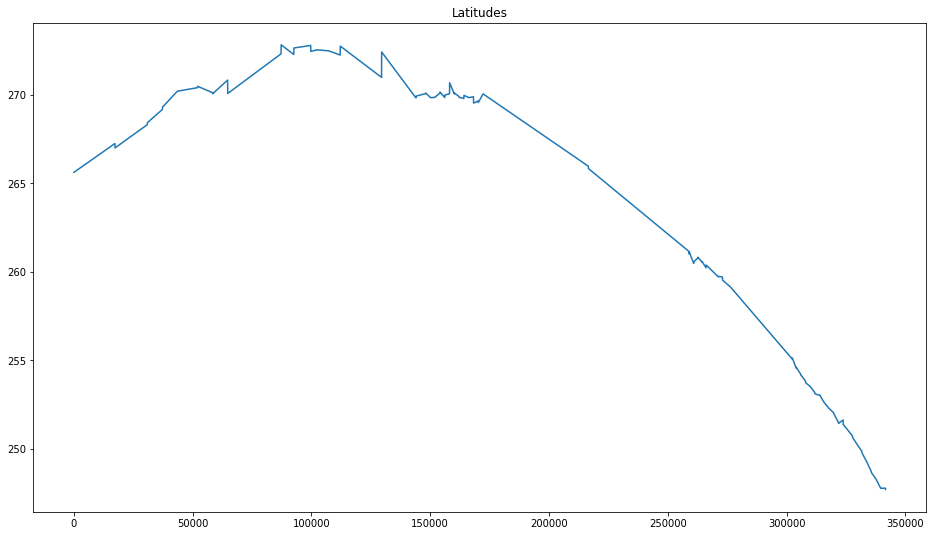

In [8]:
# Plot longitudes and latitudes over time
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title("Longitudes")
plt.plot(times_0_1,longitudes_0_1, '*')
plt.figure(figsize=(16,9))
plt.title("Latitudes")
plt.plot(times_0_1,latitudes_0_1)

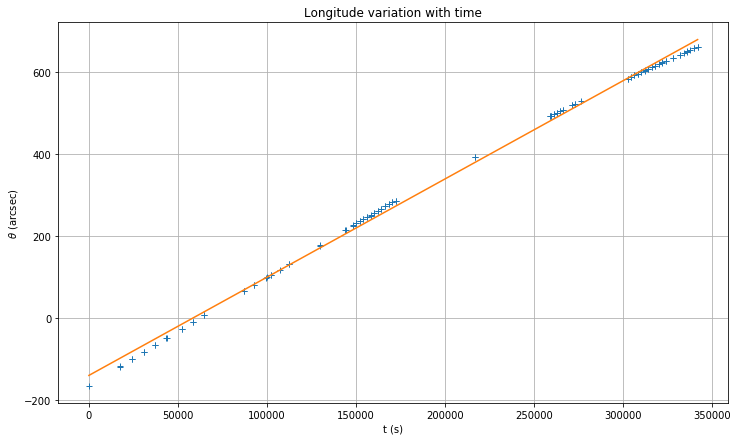

In [9]:
# Linear Fitting longitude variations (assumed constant speed)
velocity, initial_long = np.polyfit(times_0_1[0:], longitudes_0_1[0:], 1)
Y = velocity*times_0_1[0:]+initial_long
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title(r"Longitude variation with time")
plt.xlabel(r"t (s)")
plt.ylabel(r"$\theta$ (arcsec)")
plt.plot(times_0_1,longitudes_0_1, '+')
plt.plot(times_0_1[0:], Y)

In [10]:
velocity

0.0023951490821210977

In [11]:
np.average(latitudes_0_1)

262.75592955267342

In [12]:
np.std(latitudes_0_1)

8.4485484583204382